In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats.stats import pearsonr


C:\Users\PC\AppData\Local\Temp\ipykernel_14704\1043258539.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [86]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')


In [87]:
thietbi.rename(columns={'Retail Branding' : 'Branding', 'Marketing Name' : 'MarketingName'},inplace=True)
thietbi

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


In [88]:
nguoidung_thietbi

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


In [89]:
nguoidung_sudung

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


In [90]:
#  Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
# kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb, use_id, platform, device]
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [91]:
#Hoặc dùng left-join tùy theo nhu cầu
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id', how='left')
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
235,260.66,68.44,896.96,25008,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN


In [92]:
# 5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
# bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên
# inner - join
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], left_on='device', right_on='Model')
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F
...,...,...,...,...,...,...,...,...
196,106.65,82.13,5191.12,23046,android,Moto G (4),Motorola,Moto G (4)
197,106.65,82.13,5191.12,23046,android,Moto G (4),Motorola,Moto G (4)
198,344.53,20.53,519.12,23049,android,SM-G900F,Samsung,SM-G900F
199,42.75,46.83,5191.12,23053,android,Vodafone Smart ultra 6,Vodafone,Vodafone Smart ultra 6


In [93]:
# 6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfKetQua[dfKetQua['device'].str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


In [94]:
#7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng sử dụng của các nhãn hàng
dfKetQua.groupby('Branding').agg({'outgoing_mins_per_month': 'mean', 'outgoing_sms_per_month': 'mean', 'monthly_mb': 'mean',
'use_id': 'count'})


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


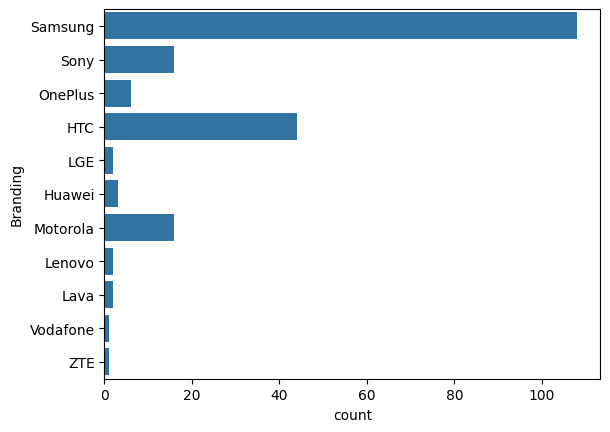

In [95]:
#8. Trực quan số lượng người dùng các nhãn hàng
sns.countplot(y='Branding', data=dfKetQua)
plt.show()

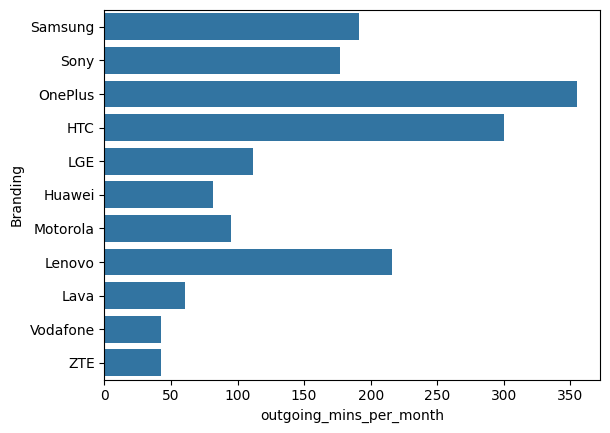

In [96]:
# 9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
# từng nhóm nhãn hàng bán lẻ
sns.barplot(y='Branding',x='outgoing_mins_per_month', data=dfKetQua,estimator=np.mean,errorbar=None,orient='horizontal')
plt.show()

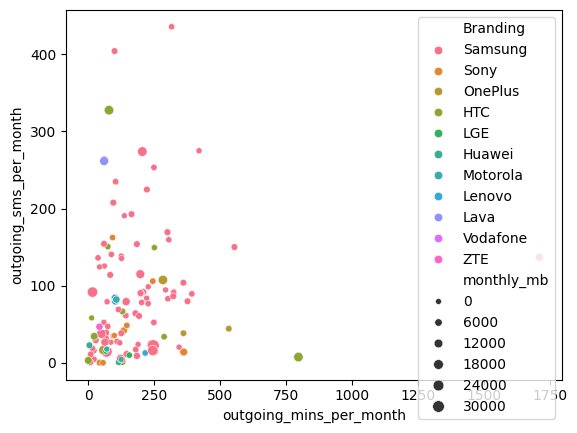

In [97]:
# 10 . Khảo sát tương qua giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng
sns.scatterplot(x='outgoing_mins_per_month',y='outgoing_sms_per_month',
size='monthly_mb',hue='Branding',data=dfKetQua)                
plt.show()

In [98]:
# 11.Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút
ztest(dfKetQua['outgoing_mins_per_month'], value=200)

(np.float64(0.3678324474067915), np.float64(0.7129981730830808))

In [99]:
# 12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn
ztest(dfKetQua['outgoing_sms_per_month'], value=100)

(np.float64(-2.9567085781961198), np.float64(0.0031094184670620866))

In [100]:
# 13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb 
ztest(dfKetQua['monthly_mb'], value=2048)

(np.float64(5.918078326415772), np.float64(3.257248511198872e-09))

In [101]:
# 14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan 
dfKetQua[['outgoing_mins_per_month','outgoing_sms_per_month','monthly_mb']].corr()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
outgoing_mins_per_month,1.000000,-0.016494,0.213489
outgoing_sms_per_month,-0.016494,1.000000,-0.046049
monthly_mb,0.213489,-0.046049,1.000000


In [107]:
# 15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan 
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

PearsonRResult(statistic=np.float64(-0.01649444168531939), pvalue=np.float64(0.8162223636414785))

In [110]:
# 16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding 
cd = pd.crosstab(dfKetQua['platform'], [dfKetQua['Branding']], rownames=['platform'], colnames=['Branding'])
cd

Branding,HTC,Huawei,LGE,Lava,Lenovo,Motorola,OnePlus,Samsung,Sony,Vodafone,ZTE
platform,,,,,,,,,,,
android,44,3,2,2,2,16,6,108,16,1,1


In [114]:
from scipy.stats import chi2_contingency

In [120]:
stat, p, dof, expected = chi2_contingency(cd)
ap = 0.05
print("p value: " + str(p))
if p <= ap:

    print('Dependent (reject H0)')


else:
    print('Independent (H0 holds true)')



    

p value: 1.0
Independent (H0 holds true)


In [121]:
# 17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform 
cd2 = pd.crosstab(dfKetQua['monthly_mb'], [dfKetQua['platform']], rownames=['monthly_mb'], colnames=['platform'])

stat, p, dof, expected = chi2_contingency(cd2)

alpha = 0.05
print("p value: " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value: 1.0
Independent (H0 holds true)


In [113]:
# 18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding 
